# Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [1]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/danyesid/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/danyesid/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/danyesid/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/danyesid/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/danyesid/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/danyesid/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nlt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Analizando un texto

In [2]:
# escogemos text1 que es el famoso libro Moby Dick
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
# Vemos que el texto ya viene tokenizado incluyendo caracteres especiales ....
text1.tokens[:100]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '"',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',']

In [4]:
# ¿Cuantos tokens tiene el libro?
len(text1)

260819

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [5]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
vocabulario[1000:1050]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [6]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1)
print(rl)

0.07406285585022564


In [7]:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [9]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('the', text1)

5.260736372733581

In [0]:
# y calcular en conteo el numero de veces que aparece:
text1.count('monster')

49

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


In [10]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

{'saying': 40,
 'insomuch': 2,
 'impulsively': 1,
 'ceasing': 1,
 'snaky': 2,
 'Leviathan': 64,
 'heed': 5,
 'developed': 3,
 'pirate': 5,
 'comparable': 1,
 'thence': 7,
 'lecherous': 1,
 'returning': 6,
 'Deliberately': 1,
 'Perseus': 11,
 'sane': 2,
 'terraqueous': 1,
 'yelled': 6,
 'ascriptions': 1,
 'experienced': 11,
 'brightest': 1,
 'meanly': 1,
 'blasphemous': 1,
 'Yon': 1,
 'destroys': 1,
 'Goa': 1,
 'dressing': 1,
 'sheds': 1,
 'whiteness': 26,
 'spiracles': 1,
 'hostilely': 1,
 'intrepidity': 1,
 'base': 20,
 'calling': 12,
 'snapped': 8,
 'wight': 5,
 'checkered': 1,
 'lotion': 1,
 'obstinate': 2,
 'APPLICATION': 1,
 'Hast': 10,
 'Guido': 2,
 'Monkey': 1,
 'Archipelagoes': 1,
 'fished': 1,
 'unexhilarated': 1,
 'rivet': 1,
 'Andrew': 1,
 'unusable': 1,
 'count': 2,
 'chancing': 4,
 'arranging': 1,
 'tearingly': 1,
 'plays': 2,
 'put': 72,
 'tub': 14,
 'ruthless': 3,
 'liberated': 1,
 'rap': 3,
 'veins': 4,
 'HOW': 1,
 'OTHER': 2,
 'smithies': 1,
 'recovers': 1,
 '135': 1,


## Método FreqDist de NLTK

In [11]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1)

In [12]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

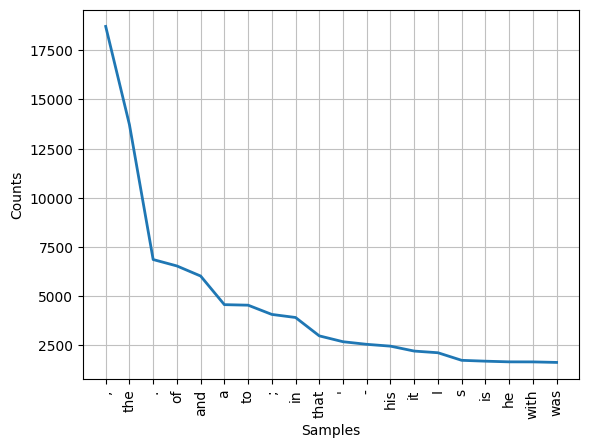

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
fdist.plot(20)

In [14]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [0]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [0]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

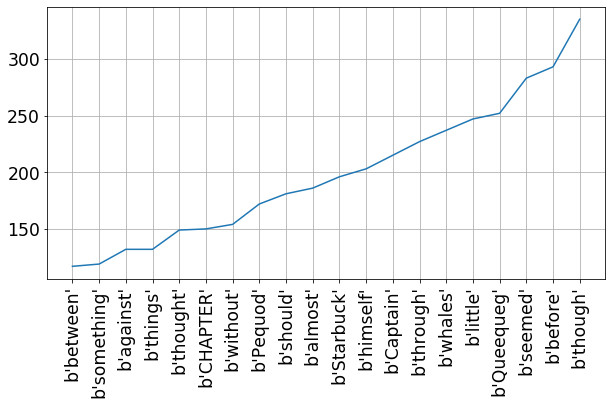

In [0]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()